In [67]:
# define the path of the data and project
data_path = 'D:/VScode/MRes/scienceweb.whoi.edu/itp/data/'

In [68]:
# read the cleaned xarray from local file
import xarray as xr
ds_cleaned=xr.open_dataset(f"{data_path}/ds_cleaned.nc")

In [69]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [70]:
ds_cleaned.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...>

In [85]:
import numpy as np
import pandas as pd
import xarray as xr


# Extract the temperature and salinity data
temperature=ds_cleaned['temperature'].values
salinity=ds_cleaned['salinity'].values


In [82]:
temperature

array([[-1.4952    , -1.4949    , -1.3418    , ...,  0.8325    ,
         0.83611818,  0.82901818],
       [-1.5139    , -1.5131    , -1.4878    , ...,  0.838     ,
         0.8495    ,  0.8336    ],
       [-1.53845   , -1.5409    , -1.5384    , ...,  0.8388    ,
         0.8229    ,  0.8161    ],
       ...,
       [-1.6245    , -1.6245    , -1.6245    , ...,  0.41811818,
         0.4229    ,  0.4242    ],
       [-1.62180909, -1.62132727, -1.62070909, ...,  0.4193    ,
         0.41908182,  0.4191    ],
       [-1.6221    , -1.6221    , -1.6217    , ...,  0.42148   ,
         0.42203636,  0.42028   ]])

In [125]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(temperature)
san_scaled = scaler.fit_transform(salinity)


In [134]:
# pca
from sklearn.decomposition import PCA
from scipy.stats import zscore


n_pc=3  # number of principal components
pca_T = PCA(n_components=n_pc)
pca_S=PCA(n_components=n_pc)
columns = [f'pc {i}' for i in range(1, n_pc+1)]

pca_temp = pca_T.fit_transform(temp_scaled.T)
pca_temp_df = pd.DataFrame(data = pca_temp
             , columns = columns)

# pca for salinity
pca_san = pca_S.fit_transform(san_scaled.T)
pca_san_df = pd.DataFrame(data = pca_san
                , columns = columns)

# temp_score=temp_scaled.dot(pca_temp)
# san_score=san_scaled.dot(pca_san)

temp_score=temp_scaled.dot(zscore(pca_temp))
san_score=san_scaled.dot(zscore(pca_san))

# temp_scores = pca_T.transform(temp_scaled)
# temp_loadings = temp_scores.dot(pca_T.components_)

# san_scores = pca_S.transform(san_scaled)


v_exp_temp = pca_T.explained_variance_ratio_
v_exp_san = pca_S.explained_variance_ratio_

In [133]:
zscore(pca_temp)


array([[ 236.4056098 ,  -90.95453005,  -95.6106719 ],
       [ 229.2904646 ,  -92.06492269,  -92.42811359],
       [ 223.56668487,  -89.30301616,  -89.84909782],
       [ 223.46409193,  -81.44471874,  -88.54087542],
       [ 227.14724666,  -68.98057849,  -86.10762183],
       [ 235.27961845,  -54.25692129,  -76.73764456],
       [ 247.04949202,  -37.12984167,  -63.75348848],
       [ 259.18073088,  -24.5368896 ,  -53.46988373],
       [ 268.33279617,  -16.21274867,  -45.06481784],
       [ 273.52632642,  -13.7039874 ,  -34.76299445],
       [ 276.23632886,  -15.34756994,  -23.94038838],
       [ 277.31404893,  -19.29072726,  -14.14350979],
       [ 276.7028416 ,  -24.22701363,   -4.62653357],
       [ 274.16540293,  -28.66370991,    6.90646881],
       [ 269.43745571,  -32.3540476 ,   21.41812347],
       [ 260.52588837,  -35.48745593,   39.22773935],
       [ 246.41093263,  -38.50287282,   59.21238773],
       [ 225.08729498,  -41.27242279,   81.11662219],
       [ 196.42787387,  -43.

In [135]:
temp_score

array([[ 46.69624792,  27.9841812 , -13.38414855],
       [ 36.91752574,  30.5645297 ,  -7.79147595],
       [ 26.63276932,  31.03584197, -15.33983416],
       ...,
       [ -2.6480099 , -51.17385811,   5.77857076],
       [  1.48068803, -50.17398269,   5.11119449],
       [  1.94992059, -50.11482744,   4.64372234]])

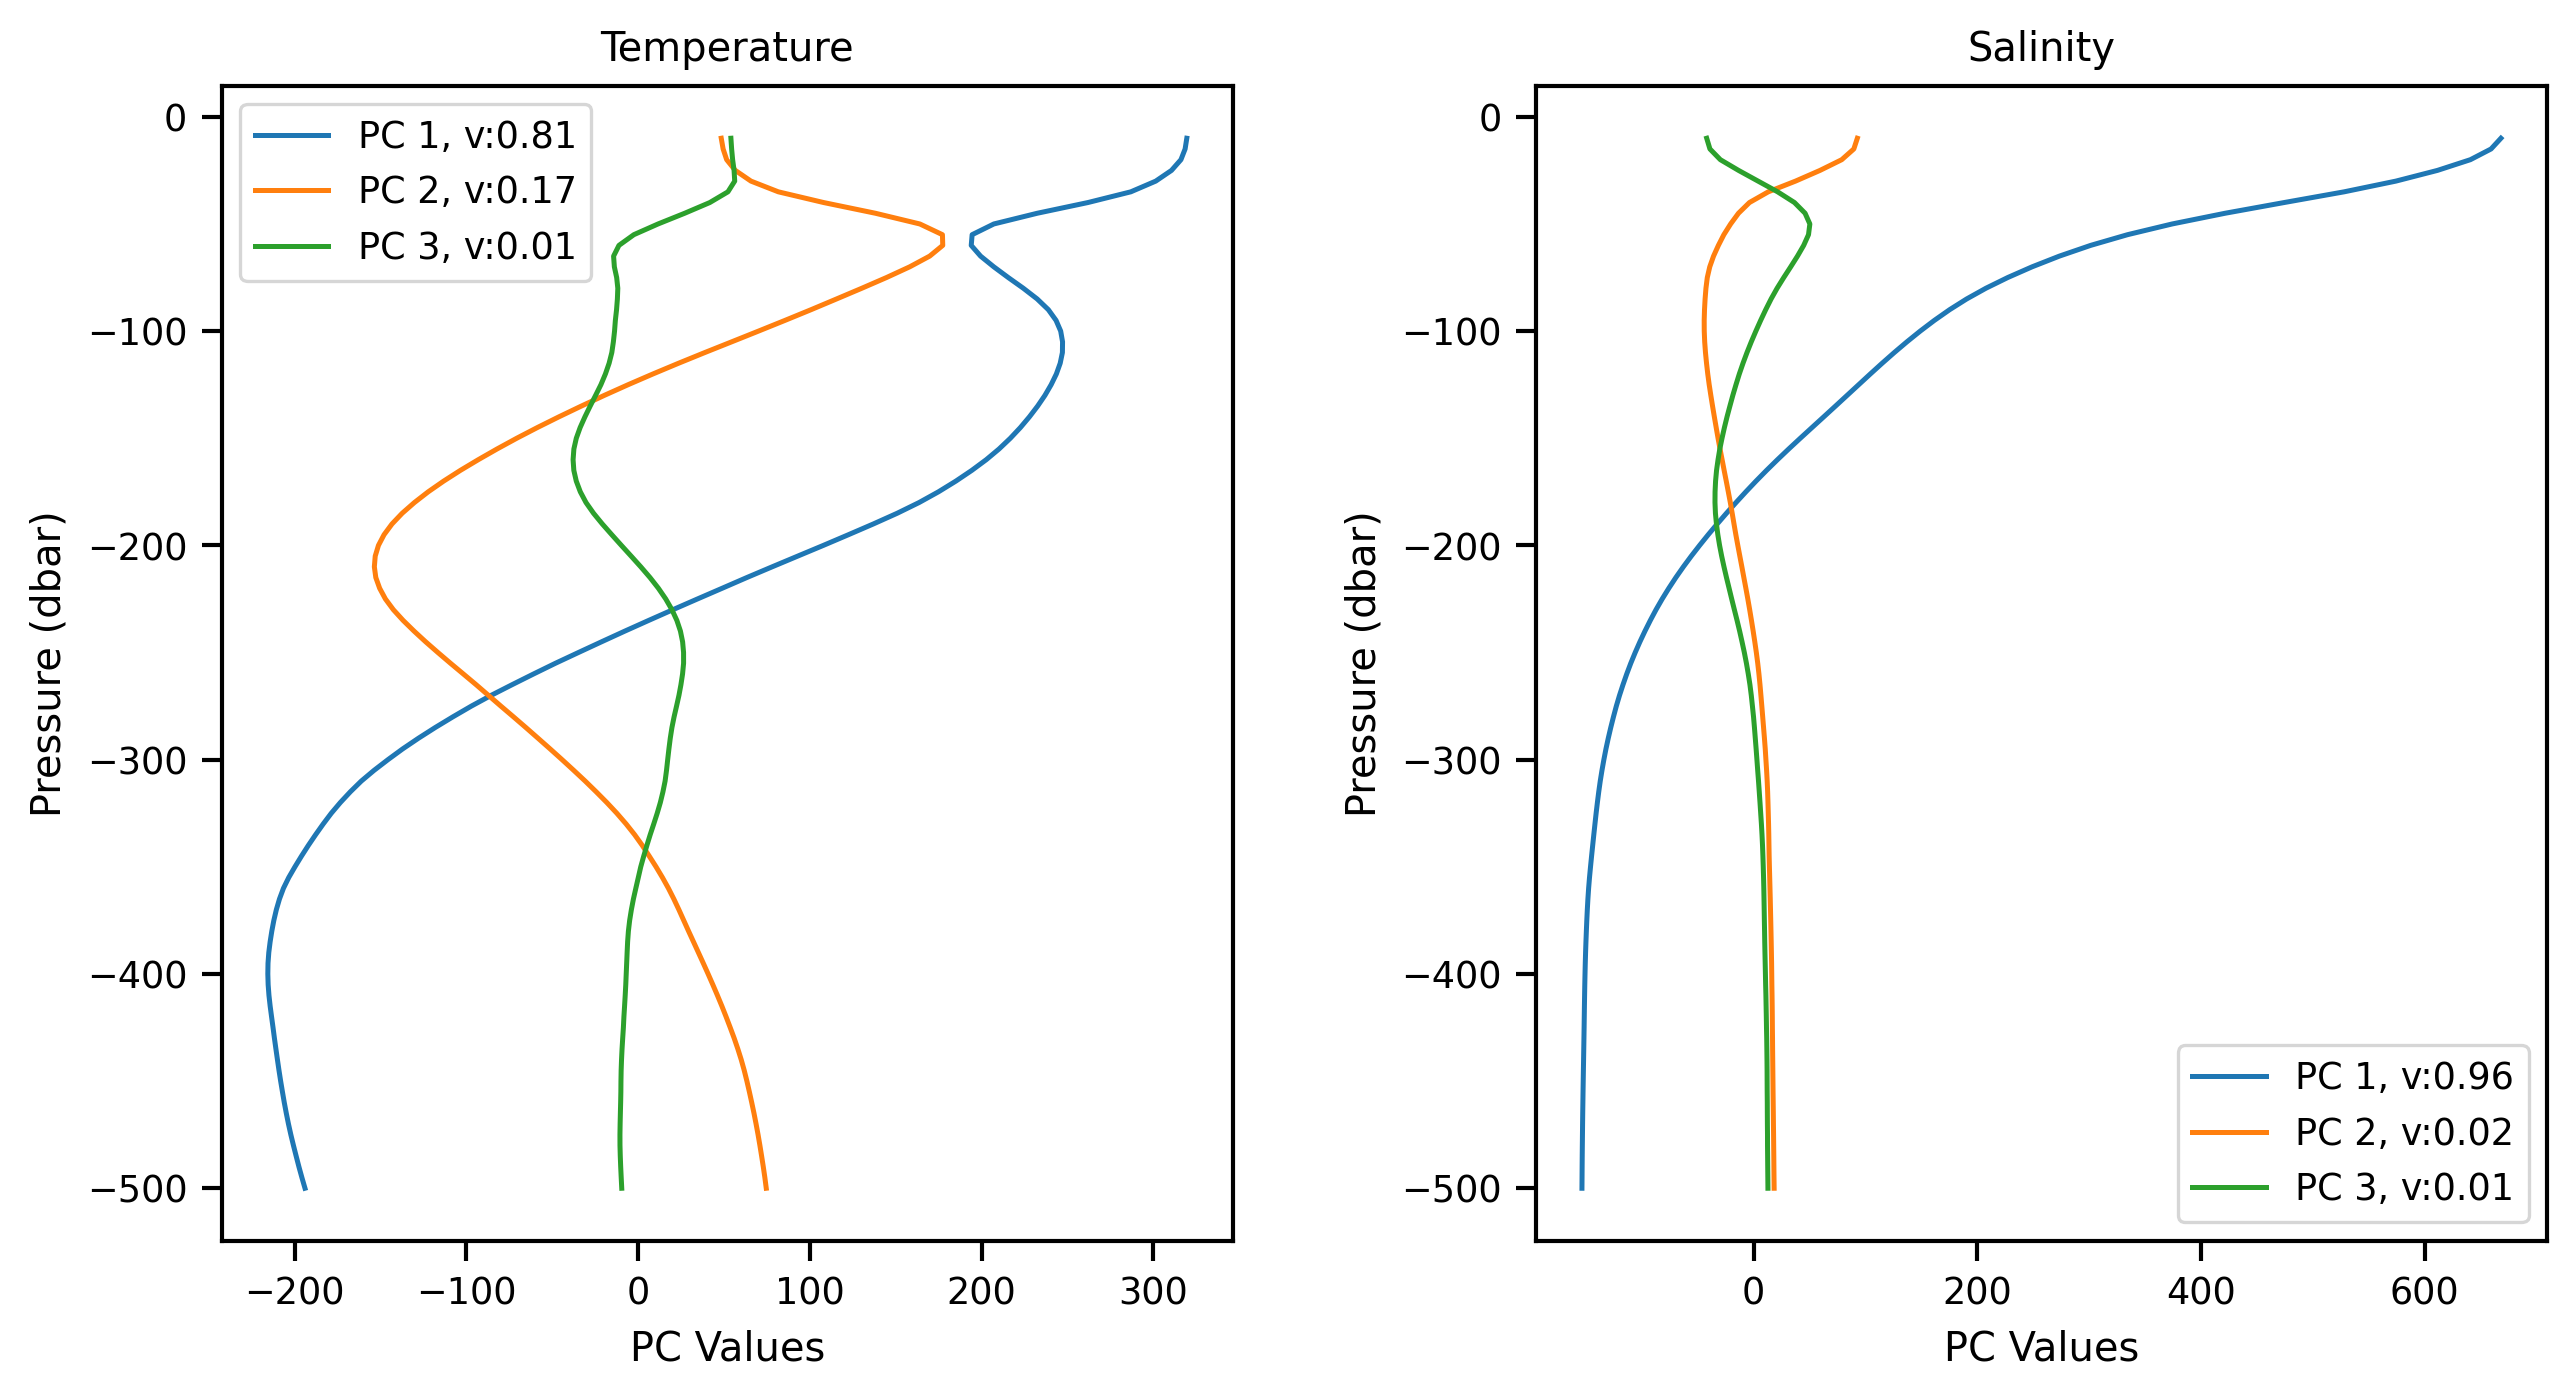

In [120]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5),dpi=300)

# Loop through all the PCs and plot them for temperature and salinity
for i in range(n_pc):
    # Plot the i-th PC for temperature in the left subplot
    axes[0].plot(pca_temp_df[f'pc {i+1}'], ds_cleaned['pressure'], label=f'PC {i+1}, v:{v_exp_temp[i]:.2f}')
    axes[0].set_title('Temperature')
    axes[0].set_xlabel('PC Values')
    axes[0].set_ylabel('Pressure (dbar)')
    # axes[0].invert_yaxis()
    axes[0].legend()
    
    # Plot the i-th PC for salinity in the right subplot
    axes[1].plot(pca_san_df[f'pc {i+1}'], ds_cleaned['pressure'], label=f'PC {i+1}, v:{v_exp_san[i]:.2f}')
    axes[1].set_title('Salinity')
    axes[1].set_xlabel('PC Values')
    axes[1].set_ylabel('Pressure (dbar)')
    # axes[1].invert_yaxis()
    axes[1].legend()
    

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the figure
plt.show()



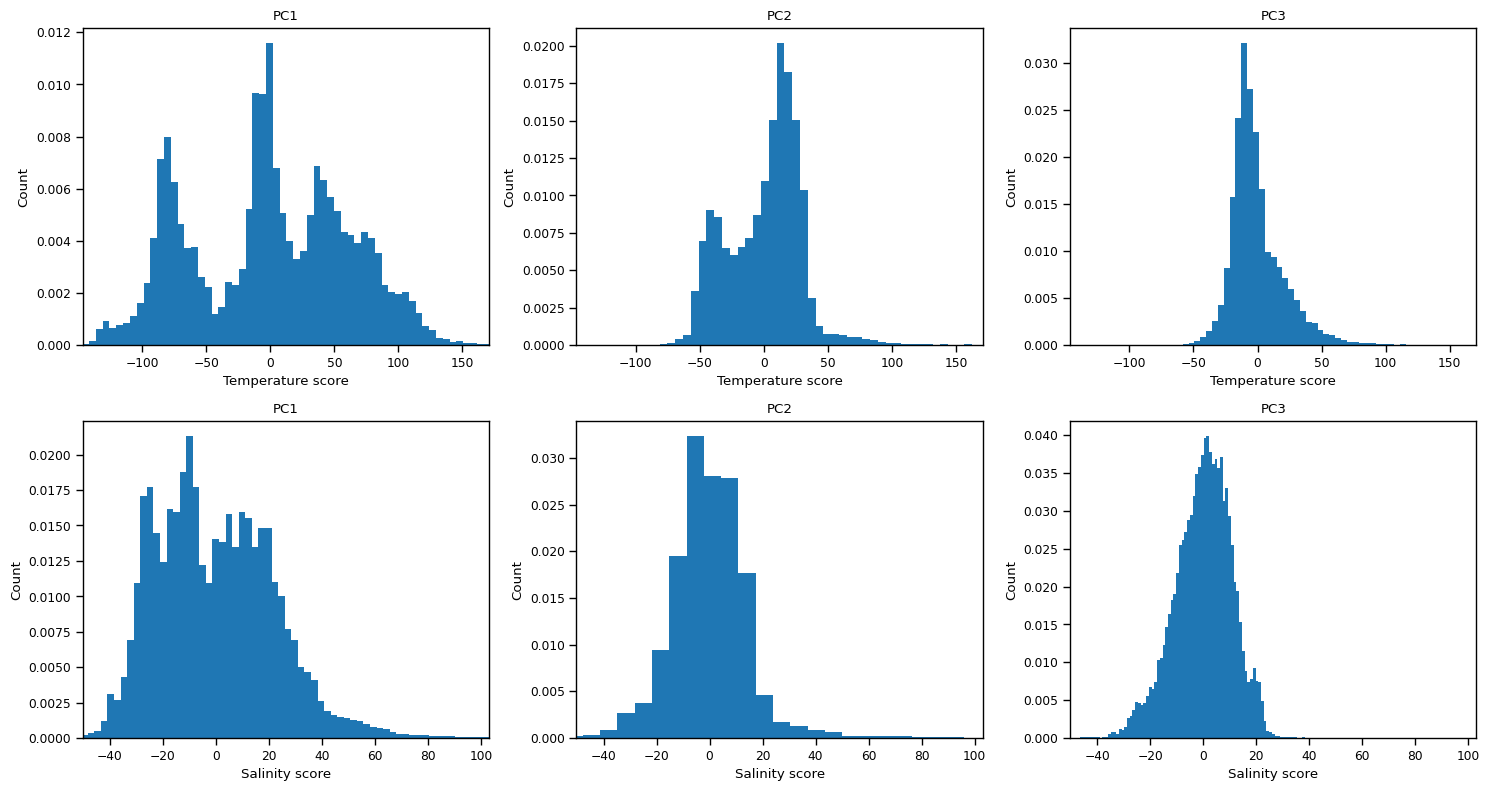

In [181]:

# plot the scores
import matplotlib.pyplot as plt

n_cols = temp_score.shape[1]  # number of principal components
fig, axs = plt.subplots(nrows=2, ncols=n_cols, figsize=(15, 8))

for i in range(n_cols):
    axs[0,i].hist(temp_score[:, i], bins=100,density=True)
    axs[0,i].set_xlim(np.quantile(temp_score,0.001), np.quantile(temp_score,0.999))
    axs[0,i].set_title(f'PC{i+1}')
    axs[0,i].set_xlabel('Temperature score')
    axs[0,i].set_ylabel('Probability density')
    #axs[0,i].set_yticklabels([str(int(ytick/len(temp_score))) for ytick in axs[0,i].get_yticks()])  # set ytick labels divided by 2

    axs[1,i].hist(san_score[:, i], bins=100,density=True)
    axs[1,i].set_xlim(np.quantile(san_score,0.001), np.quantile(san_score,0.999))
    axs[1,i].set_title(f'PC{i+1}')
    axs[1,i].set_xlabel('Salinity score')
    axs[1,i].set_ylabel('Probability density')
    # axs[1,i].set_yticklabels([str(int(ytick/len(temp_score))) for ytick in axs[1,i].get_yticks()])  # set ytick labels divided by 2

plt.tight_layout()
plt.show()



In [179]:
from sklearn.mixture import GaussianMixture

n_components = 3 # number of components in the mixture model
gmm_models = []

for i in range(temp_score.shape[1]): # loop through each column in temp_score
    gmm = GaussianMixture(n_components=n_components) # create a GMM model
    gmm.fit(temp_score[:,i].reshape(-1,1)) # fit the model to the column of temp_score
    gmm_models.append(gmm) # store the model in a list


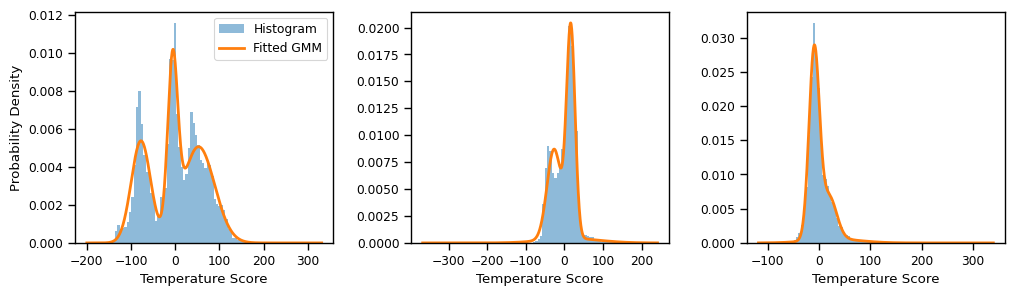

In [180]:
import matplotlib.pyplot as plt
import numpy as np

n_cols = temp_score.shape[1]  # number of principal components
fig, ax = plt.subplots(1,n_cols,figsize=(4*n_cols,3))

for i in range(n_cols):
    # Get the data for the histogram
    data = temp_score[:, i]

    # Plot the histogram
    counts, bins, _ = ax[i].hist(data, bins=100, density=True, alpha=0.5, label='Histogram')

    # Get the data for the fitted GMM
    x = np.linspace(np.min(data), np.max(data), 1000).reshape(-1, 1)
    logprob = gmm_models[i].score_samples(x)
    pdf = np.exp(logprob)

    # Plot the fitted GMM
    ax[i].plot(x, pdf, linewidth=2, label='Fitted GMM')

    # Add labels and legend
    ax[i].set_xlabel('Temperature Score')
    if i==0:
        ax[i].set_ylabel('Probability Density')
        ax[i].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()


In [178]:
gmm_models[0]

GaussianMixture(n_components=2)

In [12]:
# ds_cleaned['pressure']=-ds_cleaned['pressure']
!pip install pyxpcm

In [5]:
# check the version of numpy
import numpy as np
np.__version__

'1.24.2'

In [6]:
# the np.int() used in pyxpcm will cause error when you have numpy version > 1.22. 
# The following code repalce np.int() with int() in pyxpcm/models.py

def replace_np_int():
    import re

    # Specify the file path to models.py
    file_path = 'c:/Users/zps19/.conda/envs/pz-env/lib/site-packages/pyxpcm/models.py'

    # Open the file and read its contents
    with open(file_path, 'r') as file:
        file_contents = file.read()

    # Replace all occurrences of 'np.int' with 'int'
    new_contents = re.sub(r'np\.int', 'int', file_contents)

    # Write the modified contents back to the file
    with open(file_path, 'w') as file:
        file.write(new_contents)

if np.__version__>'1.22':
    replace_np_int()
    print('replace np.int() with int() in pyxpcm/models.py')


replace np.int() with int() in pyxpcm/models.py


In [54]:
from pyxpcm.models import pcm
import numpy as np

pstart=np.max(ds_cleaned['pressure'])
pend=np.min(ds_cleaned['pressure'])

z = np.arange(pstart,pend,-10.)
pcm_features = {'temperature': z, 'salinity':z}



In [55]:
m = pcm(K=3, features=pcm_features)
m

<pcm 'gmm' (K: 3, F: 2)>
Number of class: 3
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

In [56]:
features_in_ds = {'temperature': 'temperature', 'salinity': 'salinity'}
m.fit(ds_cleaned,features=features_in_ds,dim='pressure')

<pcm 'gmm' (K: 3, F: 2)>
Number of class: 3
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 11.899876

In [57]:
ds_cleaned=m.predict(ds_cleaned,features=features_in_ds,dim='pressure',inplace=True)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\pyxpcm\xarray.py:89: UserWarning: PCM_LABELS variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))


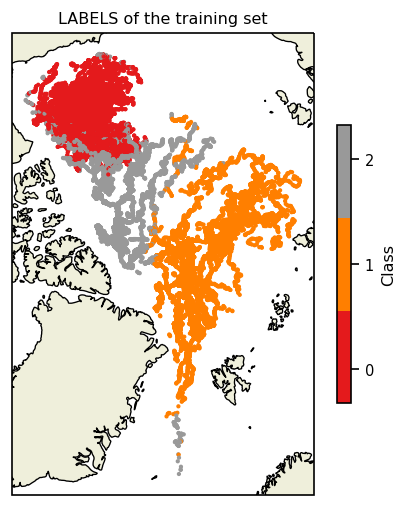

In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.NorthPolarStereo()
subplot_kw={'projection': proj, 
            #'extent':([-180,180,60,90],ccrs.PlateCarree())
           }
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds_cleaned['lon'], ds_cleaned['lat'], s=3, c=ds_cleaned['PCM_LABELS'], cmap=kmap, transform=ccrs.PlateCarree(), vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

#gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('LABELS of the training set')
plt.show()

In [ ]:
!pip install Seaborn

In [66]:
import Seaborn as sns

cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(ds_cleaned['lon'], ds_cleaned['lat'], s=3, c=ds_cleaned['PCM_POST'].sel(pcm_class=k),
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('PCM Posteriors k=%i' % k)

ModuleNotFoundError: No module named 'Seaborn'

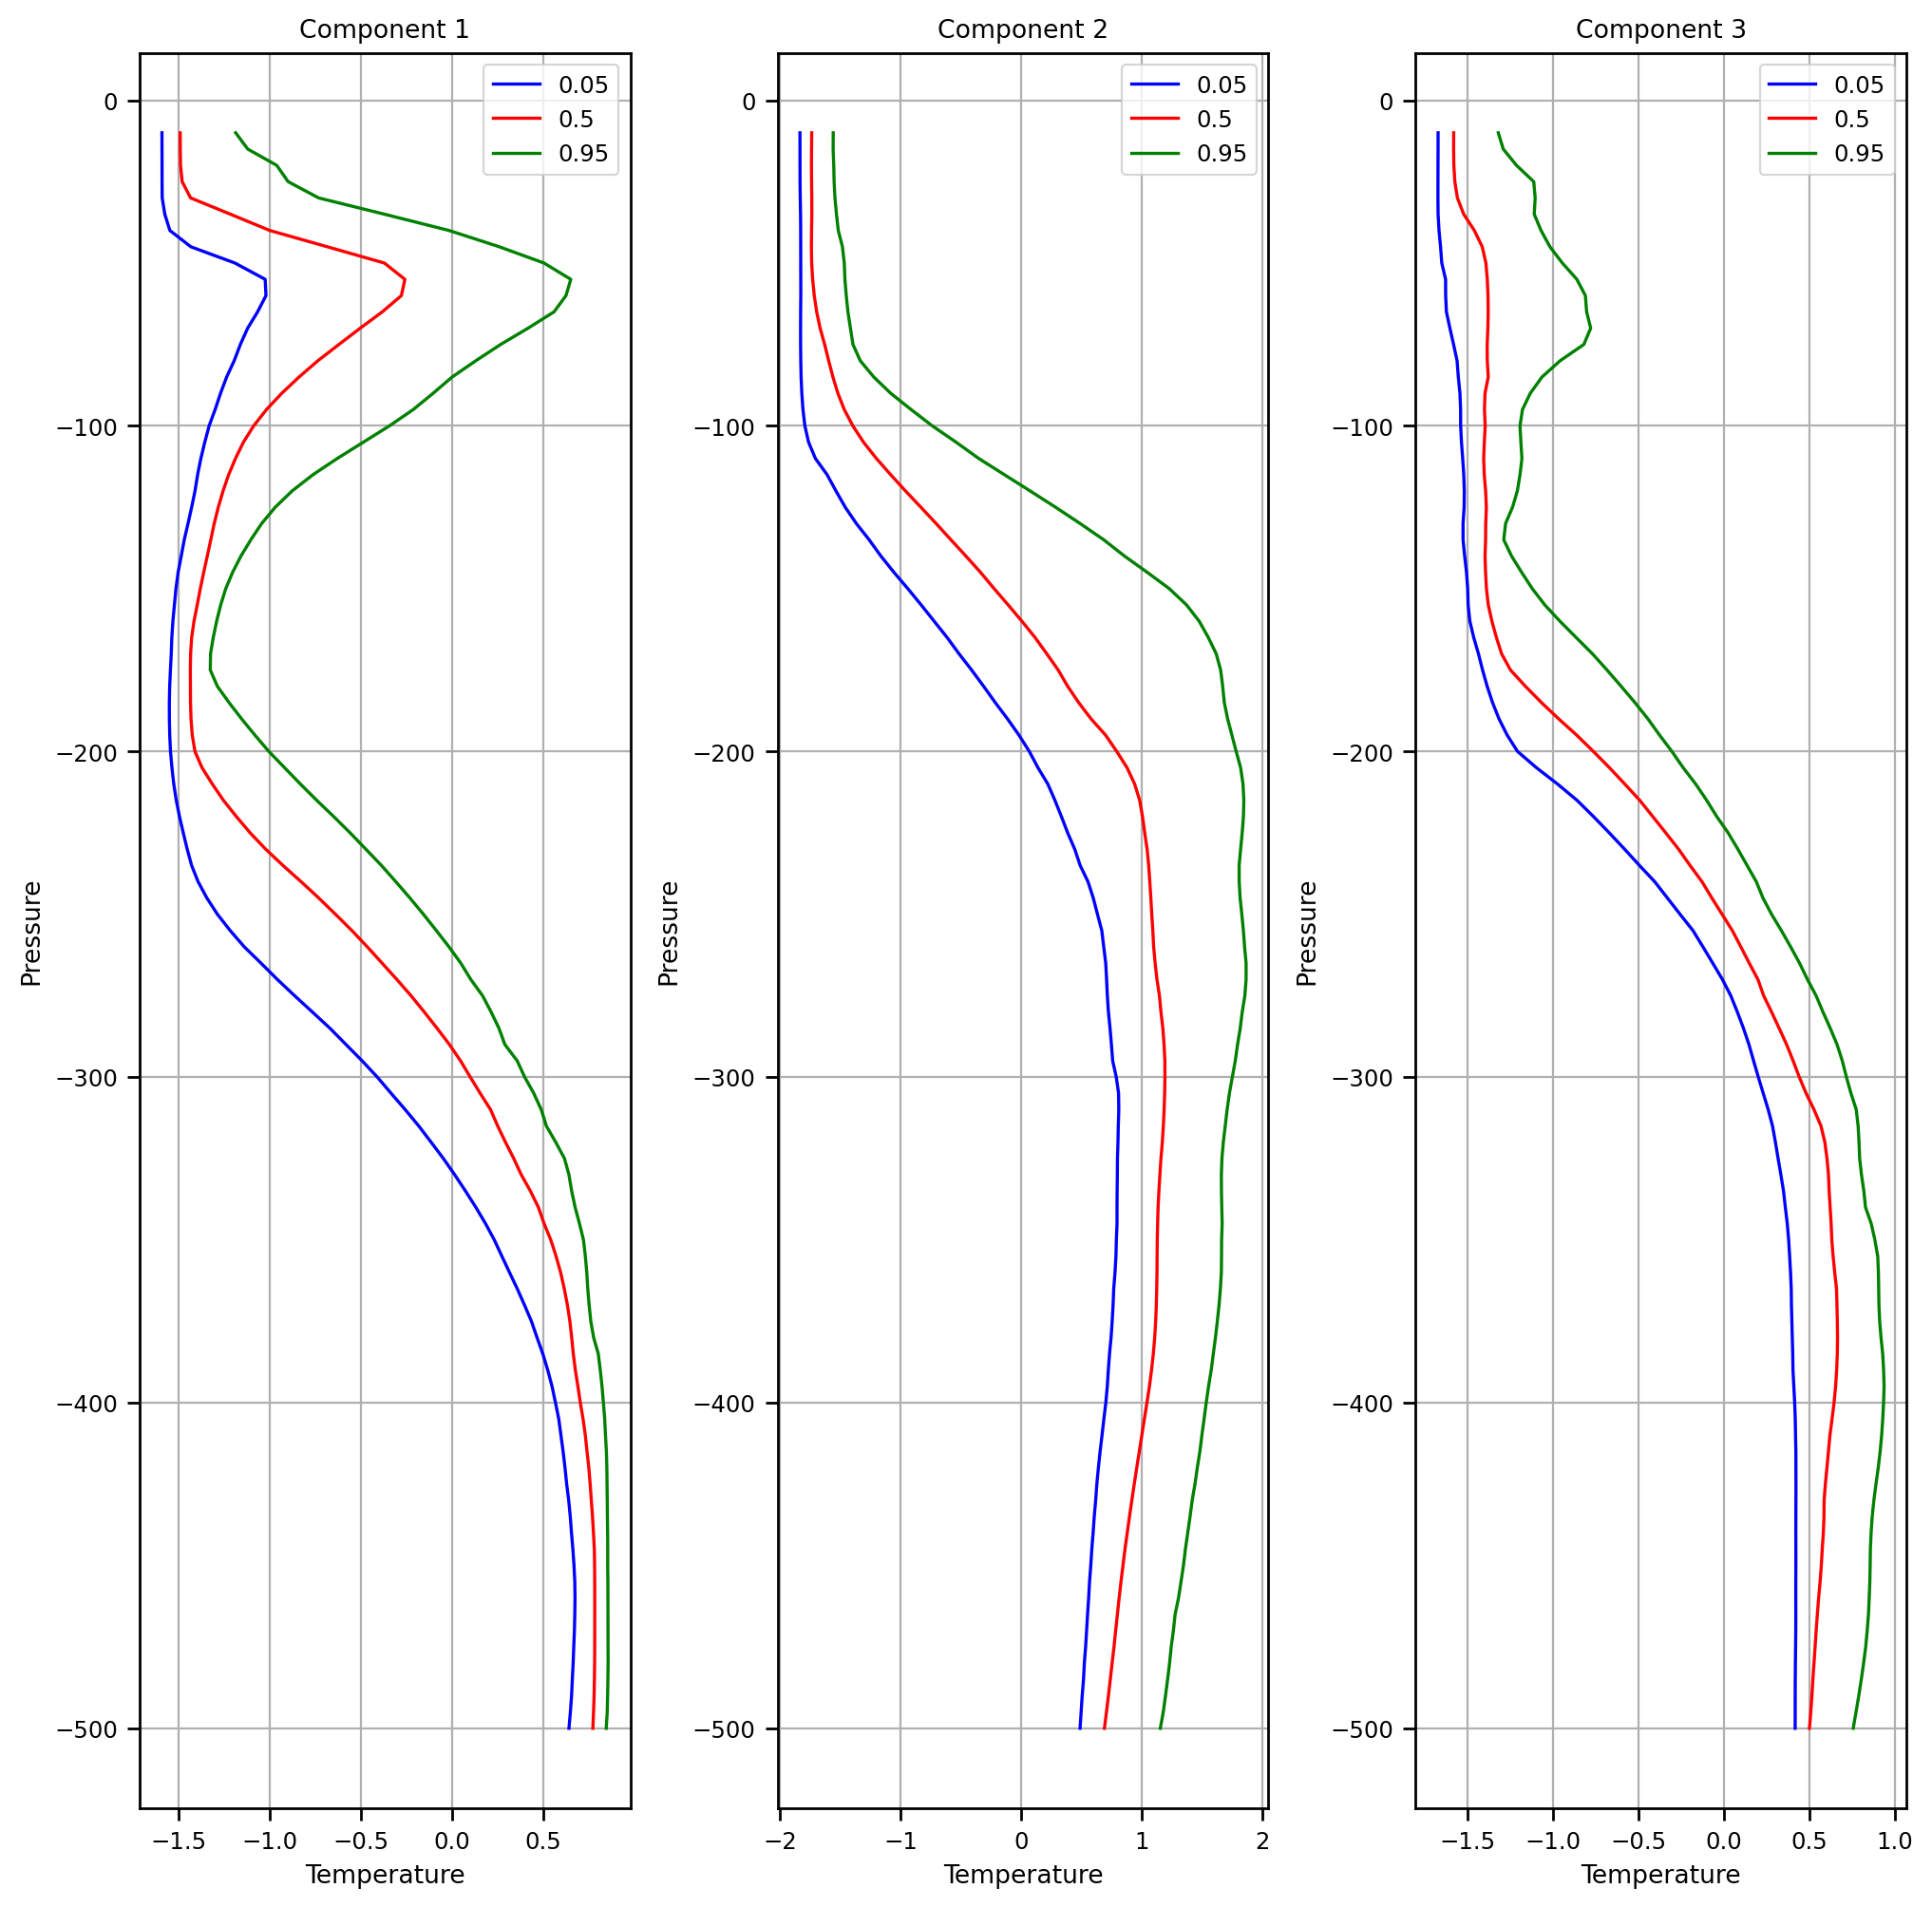

In [14]:
ds_group = ds_cleaned.groupby('PCM_LABELS')
tb.plot_quantile(ds_group)

In [21]:
ds_cleaned

<xarray.Dataset>
Dimensions:                  (nprof: 47890, pressure: 99, quantile: 3,
                              pcm_class_temperature_Q: 3)
Coordinates:
    profiler                 (nprof) int32 100 100 100 100 100 100 ... 9 9 9 9 9
    date                     (nprof) datetime64[ns] 2017-09-20T00:02:04.41600...
    lon                      (nprof) float64 -149.2 -148.8 ... -95.51 -95.29
    lat                      (nprof) float64 80.04 80.1 80.18 ... 82.75 82.76
  * pressure                 (pressure) float64 -10.0 -15.0 ... -495.0 -500.0
  * nprof                    (nprof) int64 0 1 2 3 4 ... 47886 47887 47888 47889
  * quantile                 (quantile) float64 0.05 0.5 0.95
  * pcm_class_temperature_Q  (pcm_class_temperature_Q) int64 0 1 2
Data variables:
    temperature              (nprof, pressure) float64 -1.495 -1.495 ... 0.4203
    salinity                 (nprof, pressure) float64 27.8 27.81 ... 34.84
    PCM_LABELS               (nprof) int64 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2
    temperature_Q            (pcm_class_temperature_Q, quantile, pressure) float64 ...
    salinity_Q               (pcm_class_temperature_Q, quantile, pressure) float64 ...

In [22]:
ds_cleaned.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                  (nprof: 47890, pressure: 99, quantile: 3,
                              pcm_class_temperature_Q: 3)
Coordinates:
    profiler                 (nprof) int32 100 100 100 100 100 100 ... 9 9 9 9 9
    date                     (nprof) datetime64[ns] 2017-09-20T00:02:04.41600...
    lon                      (nprof) float64 -149.2 -148.8 ... -95.51 -95.29
    lat                      (nprof) float64 80.04 80.1 80.18 ... 82.75 82.76
  * pressure                 (pressure) float64 -10.0 -15.0 ... -495.0 -500.0
  * nprof                    (nprof) int64 0 1 2 3 4 ... 47886 47887 47888 47889
  * quantile                 (quantile) float64 0.05 0.5 0.95
  * pcm_class_temperature_Q  (pcm_class_temperature_Q) int64 0 1 2
Data variables:
    temperature              (nprof, pressure) float64 -1.495 -1.495 ... 0.4203
    salinity                 (nprof, pressure) float64 27.8 27.81 ... 34.84
    PCM_LABELS               (npro

In [11]:
for vname in ['temperature', 'salinity']:
    ds_cleaned = ds_cleaned.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)    
ds_cleaned

<xarray.Dataset>
Dimensions:                  (nprof: 47890, pressure: 99, quantile: 3,
                              pcm_class_temperature_Q: 3)
Coordinates:
    profiler                 (nprof) int32 100 100 100 100 100 100 ... 9 9 9 9 9
    date                     (nprof) datetime64[ns] 2017-09-20T00:02:04.41600...
    lon                      (nprof) float64 -149.2 -148.8 ... -95.51 -95.29
    lat                      (nprof) float64 80.04 80.1 80.18 ... 82.75 82.76
  * pressure                 (pressure) float64 -10.0 -15.0 ... -495.0 -500.0
  * nprof                    (nprof) int64 0 1 2 3 4 ... 47886 47887 47888 47889
  * quantile                 (quantile) float64 0.05 0.5 0.95
  * pcm_class_temperature_Q  (pcm_class_temperature_Q) int64 0 1 2
Data variables:
    temperature              (nprof, pressure) float64 -1.495 -1.495 ... 0.4203
    salinity                 (nprof, pressure) float64 27.8 27.81 ... 34.84
    PCM_LABELS               (nprof) int64 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2
    temperature_Q            (pcm_class_temperature_Q, quantile, pressure) float64 ...
    salinity_Q               (pcm_class_temperature_Q, quantile, pressure) float64 ...

In [12]:
fig, ax = m.plot.quantile(ds_cleaned['salinity_Q'], maxcols=4, figsize=(10, 8), sharey=True)

ValueError: Can't distinguish the class dimension from the others